<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/homework-1/Modified_PLA(TASK_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3

The perceptron learning algorithm works like this: In each iteration t, pick a random (x(t), y(t)) and compute the signal s(t) = w^T(t) x(t). If y(t). s(t)<=0, update w by :

	W(t+1) = w(t) + y(t).x(t);

One may argue that this algorithm does not take the ‘closeness’ between s(t) and y(t) into consideration. Lets look at another perceptron learning algorithm: In each iteration, pick a random (x(t),y(t)) and compute s(t). If y(t).s(t) <=1, update w by

	W(t+1) = w(t) + n(y(t)-s(t)).x(t);

Where n is a constant. That is, if s(t) agrees with y(t) well (their product is > 1), the algorithm does nothing. On the other hand, if s(t) is further from y(t), the algorithm changes w(t) more. In this problem, you are asked to implement this algorithm and study its performance.

a.	Generate a training data set of size 100 similar to that used in Exercise 1.4. Generate a test data set of size 10,000 from the same process. To get g, run the algorithm above with above n = 100 on the training data set until a maximum of 1,000 updates has been reached. Plot the training dataset, the target function f, and the final hypothesis on the same figure. Report the error on the test set

b.	Use the data set in (a) and redo everything with n=1.

c.	Use the data set in (a) and redo everything with n=0.01.

d.	Use the data set in (a) and redo everything with n=0.0001.

e.	Compare the results that you get from (a) to (d).


In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Generates N random points for a given linear separator w
## if wTx > 0, y = 1; if wTx < 0, y = -1. wTx = 0 are discarded
def generate_pla(N=20,w0=0,w1=1,w2=1):
    n = 0
    X1 = []
    X2 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-10,10)
        y_step = w0 + w1*x1 + w2*x2
        if(y_step == 0):
            continue
        X1.append(x1)
        X2.append(x2)
        if(y_step > 0):
            Y.append(1)
        elif(y_step < 0):
            Y.append(-1)
        n += 1
    data = [np.array([1,X1[i],X2[i],Y[i]]) for i in range(N)]
    return data

In [12]:
f_w0, f_w1, f_w2 = 1, 1, 1
N = 10000
n=100
data1 = generate_pla(n, f_w0, f_w1, f_w2)
data = generate_pla(N, f_w0, f_w1, f_w2)

In [13]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept) )

In [14]:
import pandas as pd

df = pd.DataFrame(data)
df.drop([0], axis = 1, inplace=True)
df.columns = ['x1', 'x2', 'y']


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   y       10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [16]:
df.to_csv('synthetic_dataset_test.csv', index=False)

In [17]:
import pandas as pd

df = pd.DataFrame(data1)
df.drop([0], axis = 1, inplace=True)
df.columns = ['x1', 'x2', 'y']


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   y       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [19]:
df.to_csv('synthetic_dataset_train.csv', index=False)

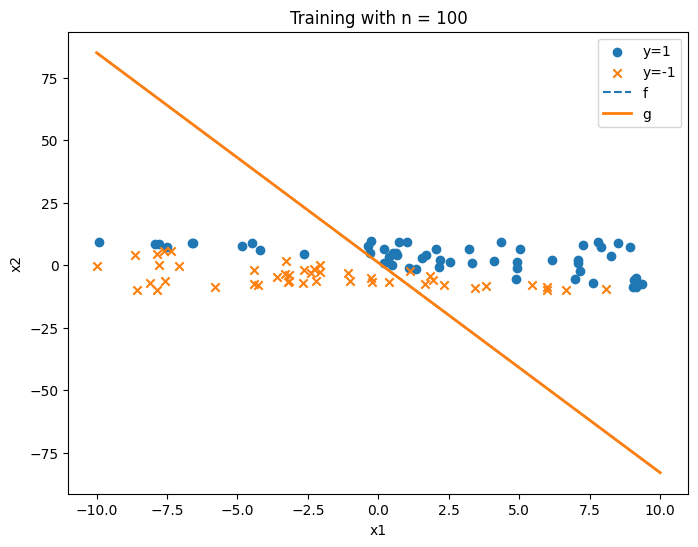

Test error with n = 100: 23.78%


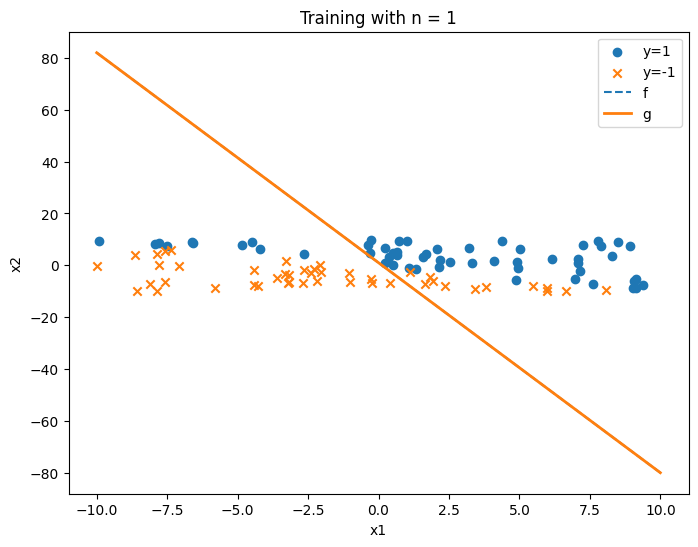

Test error with n = 1: 23.74%


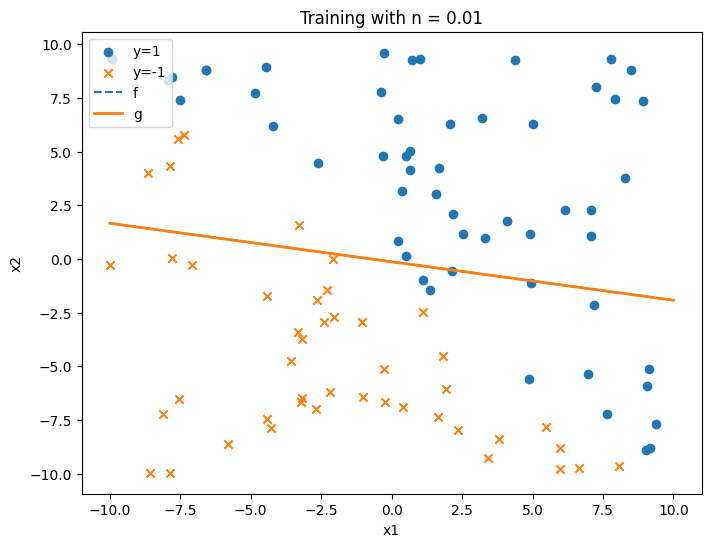

Test error with n = 0.01: 4.85%


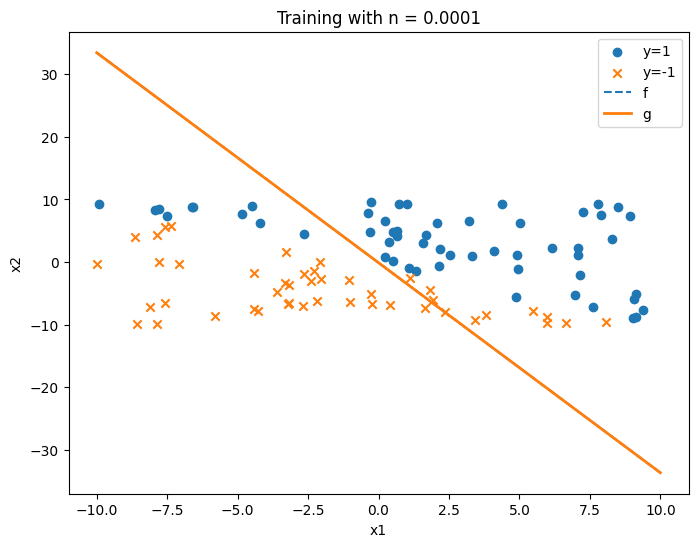

Test error with n = 0.0001: 22.77%


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the training and test datasets
train_df = pd.read_csv('synthetic_dataset_train.csv')
test_df = pd.read_csv('synthetic_dataset_test.csv')

# Initialize the weights 'w' with zeros
w = np.zeros(3)

# Define the target function 'f' from your previous values
f_w0, f_w1, f_w2 = 1, 1, 1

# Define the maximum number of updates allowed
max_updates = 1000

# Function to update weights using the perceptron learning algorithm
def update_weights(w, x, y, learning_rate):
    s = np.dot(w, x)
    if y * s <= 1:
        w += learning_rate * (y - s) * x
    return w

# Training the perceptron using different values of 'n'
def train_perceptron(train_df, learning_rate):
    w = np.zeros(3)
    updates = 0

    for _, row in train_df.iterrows():
        x = row[['x1', 'x2', 'y']].values
        x[0] = 1  # Adding bias term
        y = row['y']
        w = update_weights(w, x, y, learning_rate)
        updates += 1

        if updates >= max_updates:
            break

    return w

# Define a function to calculate the error on the test set
def calculate_test_error(w, test_df):
    errors = 0

    for _, row in test_df.iterrows():
        x = row[['x1', 'x2', 'y']].values
        x[0] = 1  # Adding bias term
        y = row['y']
        s = np.dot(w, x)

        if y * s <= 0:
            errors += 1

    return errors / len(test_df)

# Function to plot the data points, target function, and hypothesis
def plot_data_and_hypothesis(train_df, w, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(train_df[train_df['y'] == 1]['x1'], train_df[train_df['y'] == 1]['x2'], label='y=1', marker='o')
    plt.scatter(train_df[train_df['y'] == -1]['x1'], train_df[train_df['y'] == -1]['x2'], label='y=-1', marker='x')

    # Plot target function 'f'
    x_vals = np.linspace(-10, 10, 100)
    y_vals = (-w[0] - w[1] * x_vals) / w[2]
    plt.plot(x_vals, y_vals, label='f', linestyle='--')

    # Plot final hypothesis 'g'
    y_vals_hypothesis = (-w[0] - w[1] * x_vals) / w[2]
    plt.plot(x_vals, y_vals_hypothesis, label='g', linestyle='-', linewidth=2)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.show()

# Define learning rates
learning_rates = [100, 1, 0.01, 0.0001]

for learning_rate in learning_rates:
    # Train the perceptron
    w = train_perceptron(train_df, learning_rate)

    # Plot the training dataset, target function, and final hypothesis
    plot_data_and_hypothesis(train_df, w, f'Training with n = {learning_rate}')

    # Calculate and report the test error
    test_error = calculate_test_error(w, test_df)
    print(f'Test error with n = {learning_rate}: {test_error:.2%}')
